In [105]:
# import pandas, numpy and pycaret
import pandas as pd
import numpy as np
from pycaret.regression import *
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Read train and test data then concat them into df
train = pd.read_csv('data/train.csv')
train.columns = train.columns.str.lower()
test = pd.read_csv('data/test.csv')
test.columns = test.columns.str.lower()

df = pd.concat([train, test], ignore_index=True)
df.set_index('id', inplace=True)
df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


           saleprice  log_saleprice
count    1460.000000    1460.000000
mean   180921.195890      12.024057
std     79442.502883       0.399449
min     34900.000000      10.460271
25%    129975.000000      11.775105
50%    163000.000000      12.001512
75%    214000.000000      12.273736
max    755000.000000      13.534474


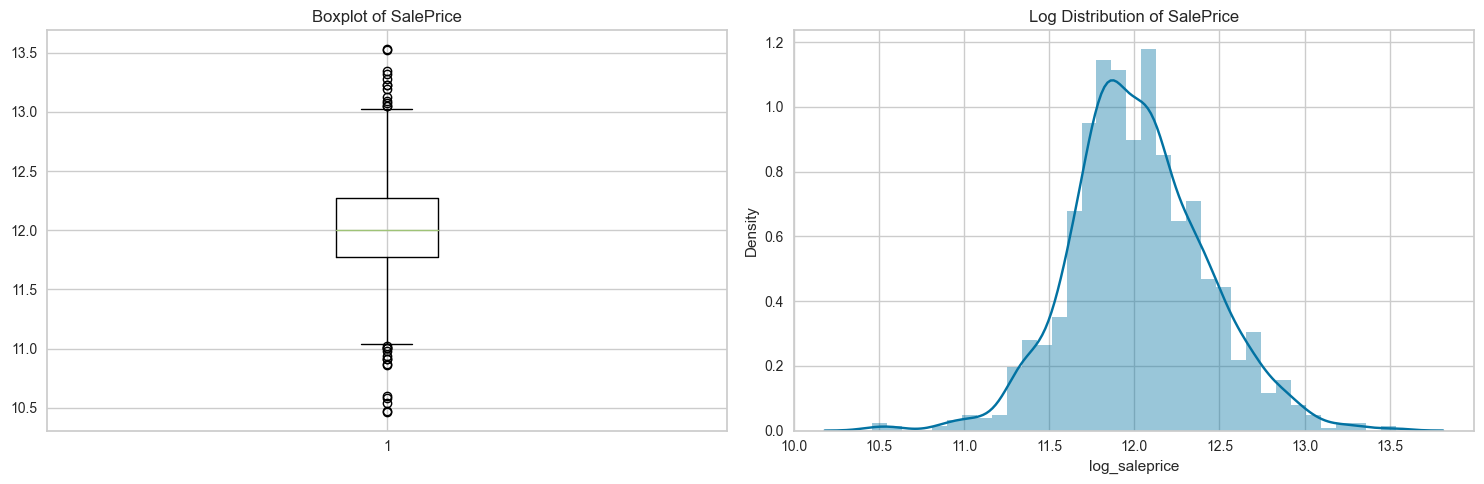

In [106]:
# Calculate np.log saleprice
df['log_saleprice'] = np.log1p(df['saleprice'])

print(df[['saleprice', 'log_saleprice']].describe())

# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the first plot in the top-left subplot
axes[0].boxplot(df['log_saleprice'].dropna())
axes[0].set_title('Boxplot of SalePrice')

# Plot the second plot in the top-right subplot
sns.distplot(df['log_saleprice'], ax=axes[1])
axes[1].set_title('Log Distribution of SalePrice')
# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()


## Exploring Null values

In [107]:
# Viewing variables with null values
null_df = (df.isnull().sum().sort_values(ascending=False) / len(df))
null_df = null_df[null_df > 0]
print('Cantidad de variables nulas:', len(null_df))
df[null_df.index].dtypes.value_counts()

Cantidad de variables nulas: 36


object     23
float64    13
dtype: int64

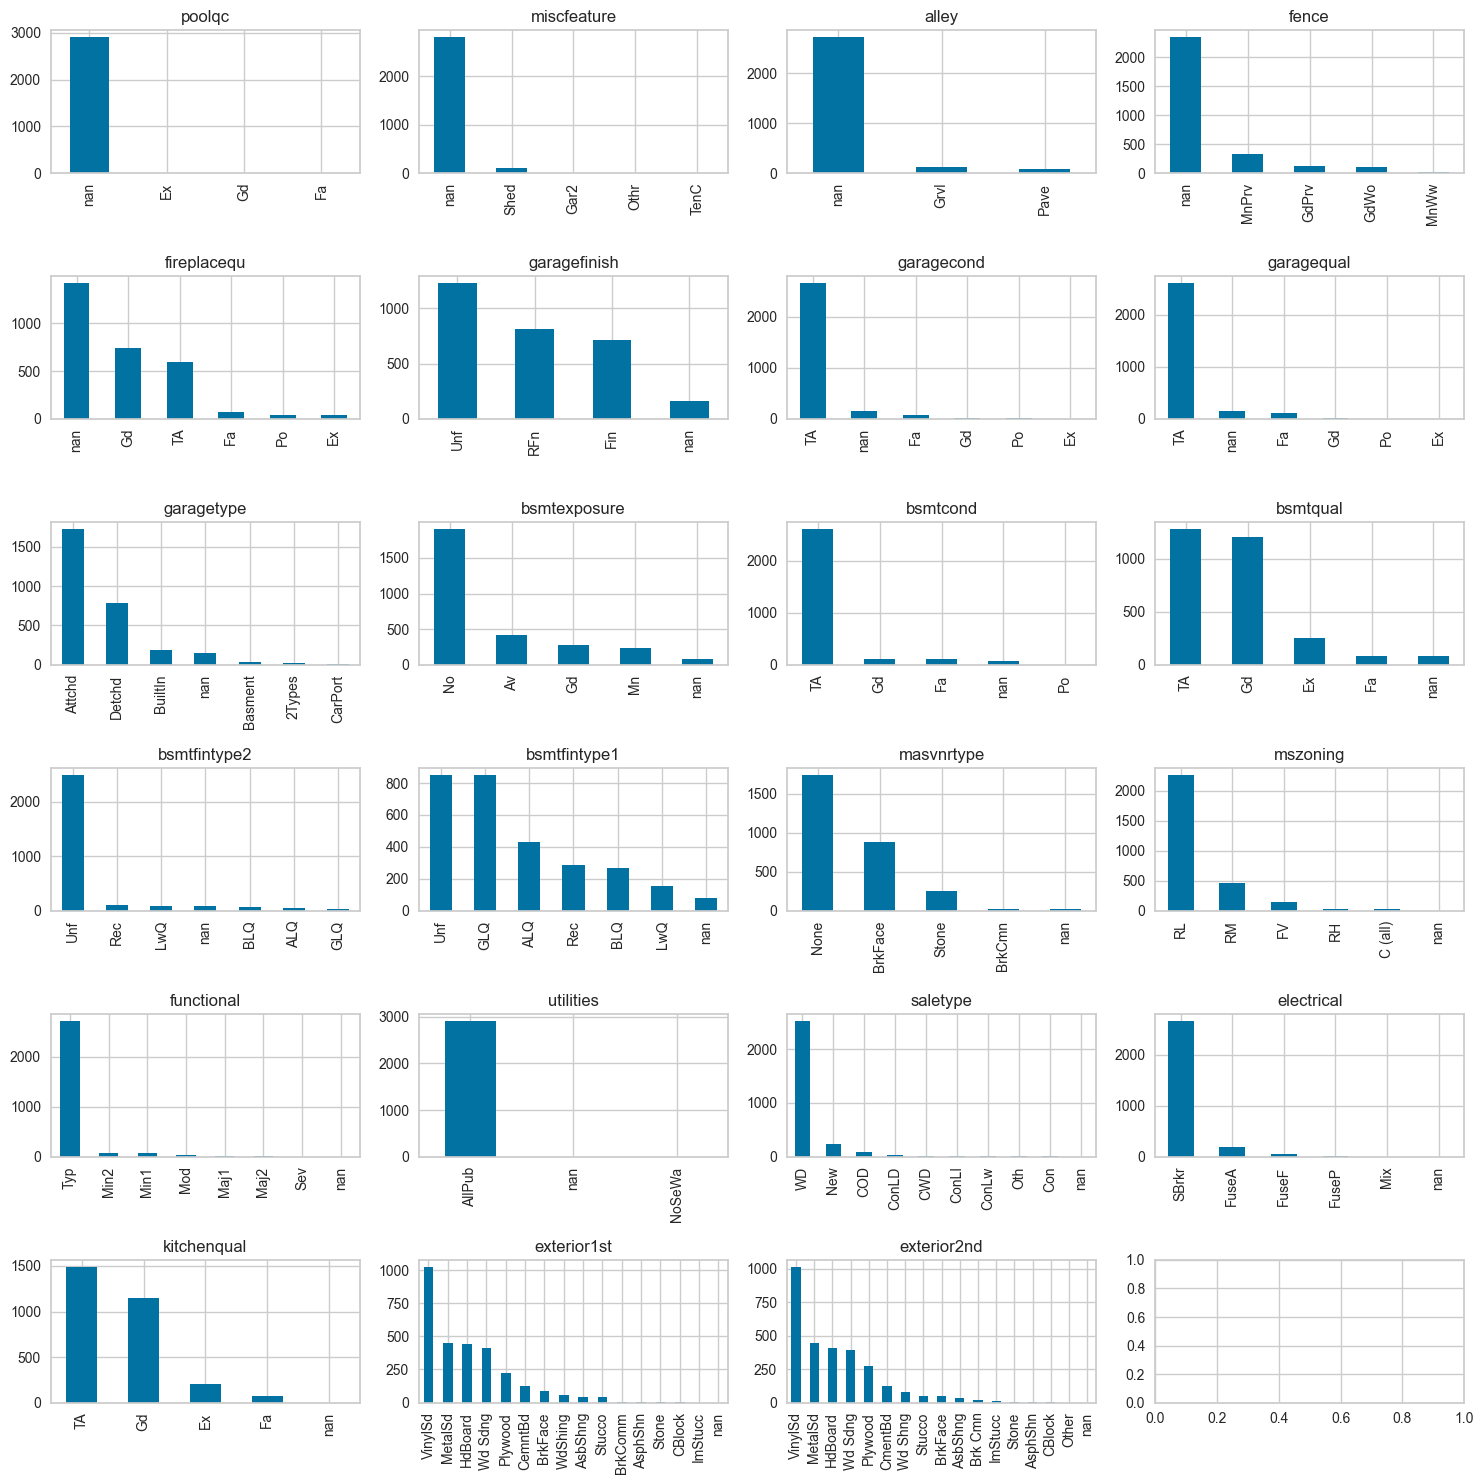

In [108]:
null_objects = df[null_df.index].select_dtypes(include='object').columns

# Subplot 6x4 null objects distribution
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))
for i, col in enumerate(null_objects):
  ax = df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i // 4, i % 4], rot=90)
  axes[i // 4, i % 4].set_title(col)
  axes[i // 4, i % 4].set_xticklabels(axes[i // 4, i % 4].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

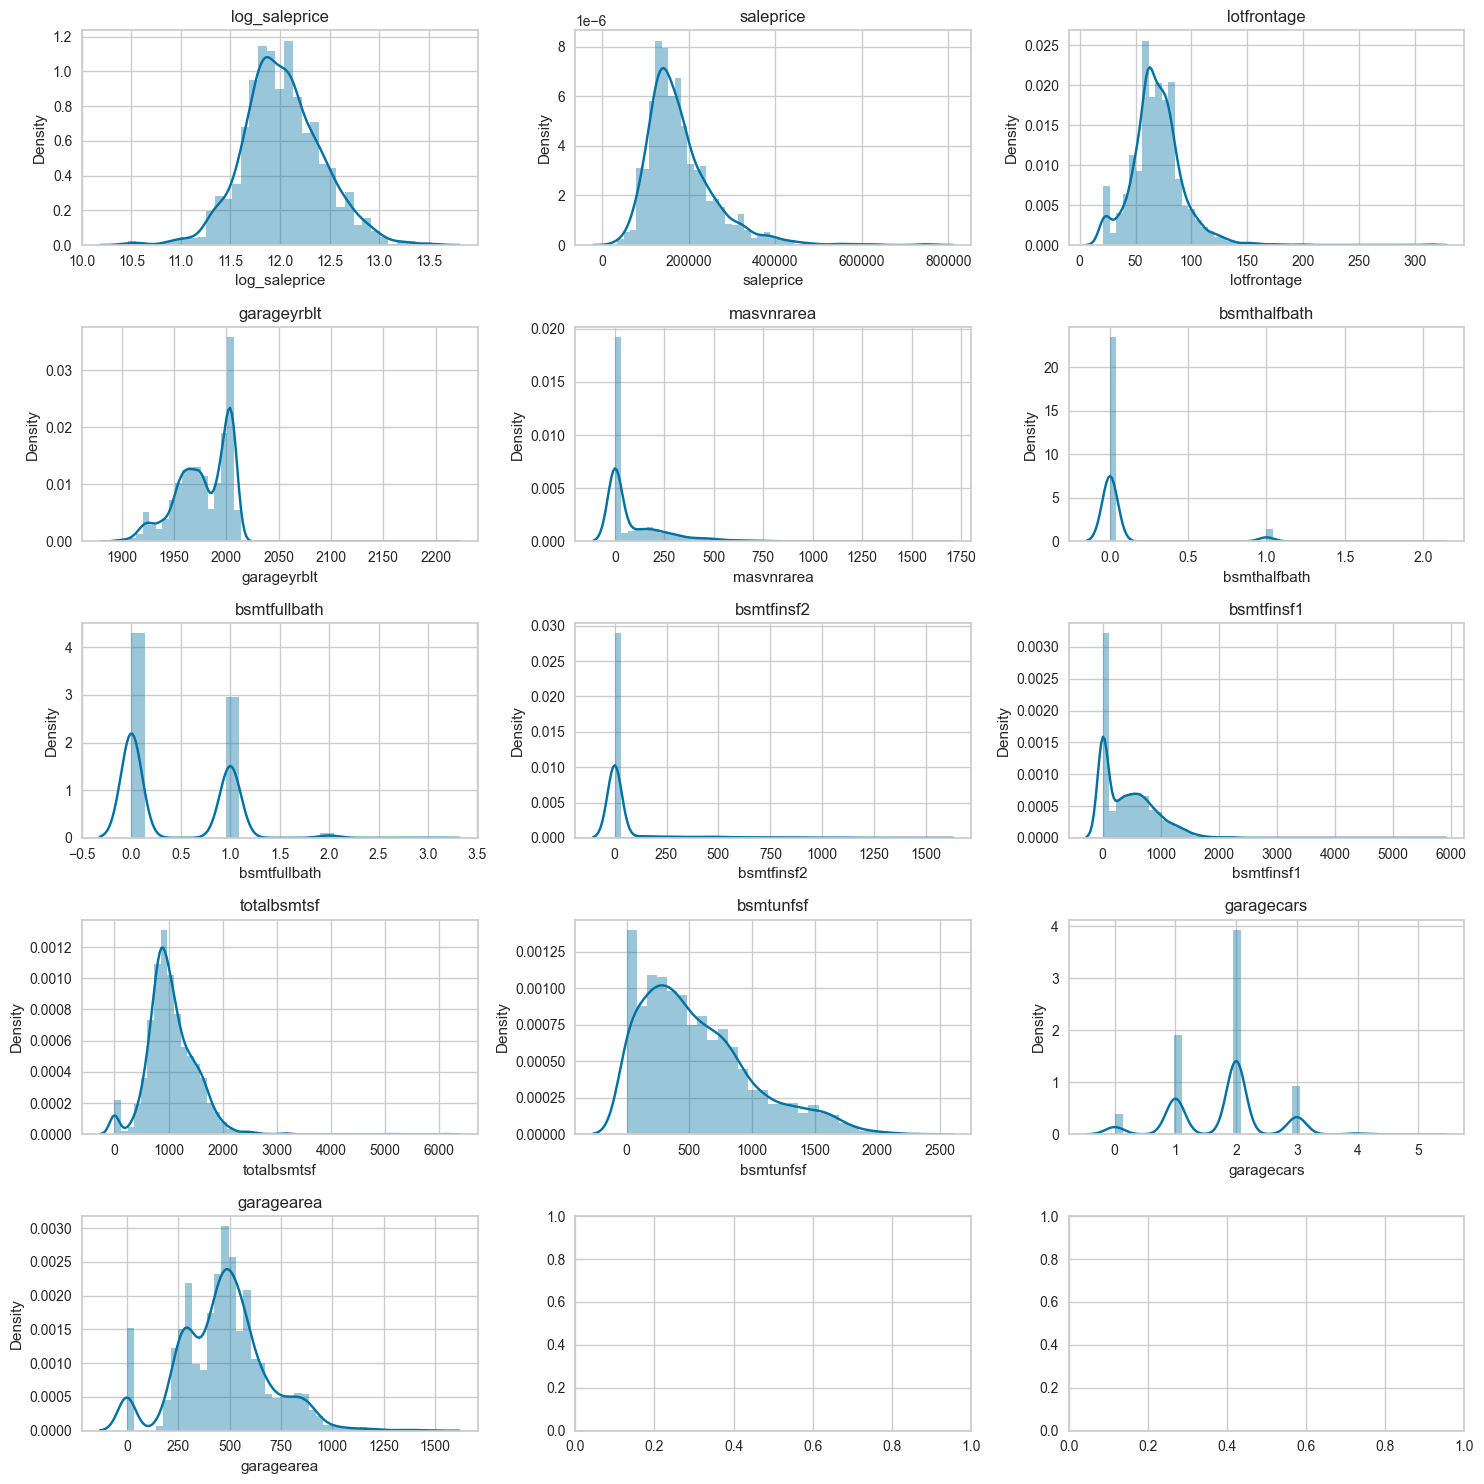

In [109]:
# Get the numeric columns from null_df
numeric_columns = df[null_df.index].select_dtypes(include=[np.number]).columns

# Set the overall subplot size
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Iterate over the numeric columns and create a distribution plot in each subplot
for i, col in enumerate(numeric_columns):
  row_index = i // 3  # Calculate the row index
  col_index = i % 3   # Calculate the column index
  sns.distplot(df[col], ax=axes[row_index, col_index])
  axes[row_index, col_index].set_title(col)

# Adjust the subplot layout
plt.tight_layout()
plt.show()

In [110]:
# Replace 'NA' with 'None' for certain columns based on data description
for col in ['poolqc', 'fence', 'miscfeature']:
    df[col] = df[col].fillna('None')

# Fill missing values with mode for categorical columns
for col in null_objects:
    df[col] = df[col].fillna(df[col].mode()[0])
    
# Inpute 'na' values with median for lotfrontage and 0 for the others
df['lotfrontage'] = df.groupby('neighborhood')['lotfrontage'].transform(lambda x: x.fillna(x.median()))
df['garageyrblt'] = df['garageyrblt'].fillna(0)
df['masvnrarea'] = df['masvnrarea'].fillna(0)
df['bsmthalfbath'] = df['bsmthalfbath'].fillna(0)
df['bsmtfullbath'] = df['bsmtfullbath'].fillna(0)
df['bsmtfinsf1'] = df['bsmtfinsf1'].fillna(0)
df['bsmtfinsf2'] = df['bsmtfinsf2'].fillna(0)
df['bsmtunfsf'] = df['bsmtunfsf'].fillna(0)
df['totalbsmtsf'] = df['totalbsmtsf'].fillna(0)
df['garagecars'] = df['garagecars'].fillna(0)
df['garagearea'] = df['garagearea'].fillna(0)

In [111]:
# Validate that there are no more null values
df.drop(columns=['saleprice', 'log_saleprice']).isnull().sum().sort_values(ascending=False)

mssubclass       0
bedroomabvgr     0
garagetype       0
fireplacequ      0
fireplaces       0
                ..
masvnrarea       0
masvnrtype       0
exterior2nd      0
exterior1st      0
salecondition    0
Length: 79, dtype: int64

In [112]:
# Convert MSSubClass, OverallQual, OverallCond, YrSold and MoSold to object type
df[['mssubclass', 'overallqual', 'overallcond', 'yrsold', 'mosold']] = df[['mssubclass', 'overallqual', 'overallcond', 'yrsold', 'mosold']].astype('object')

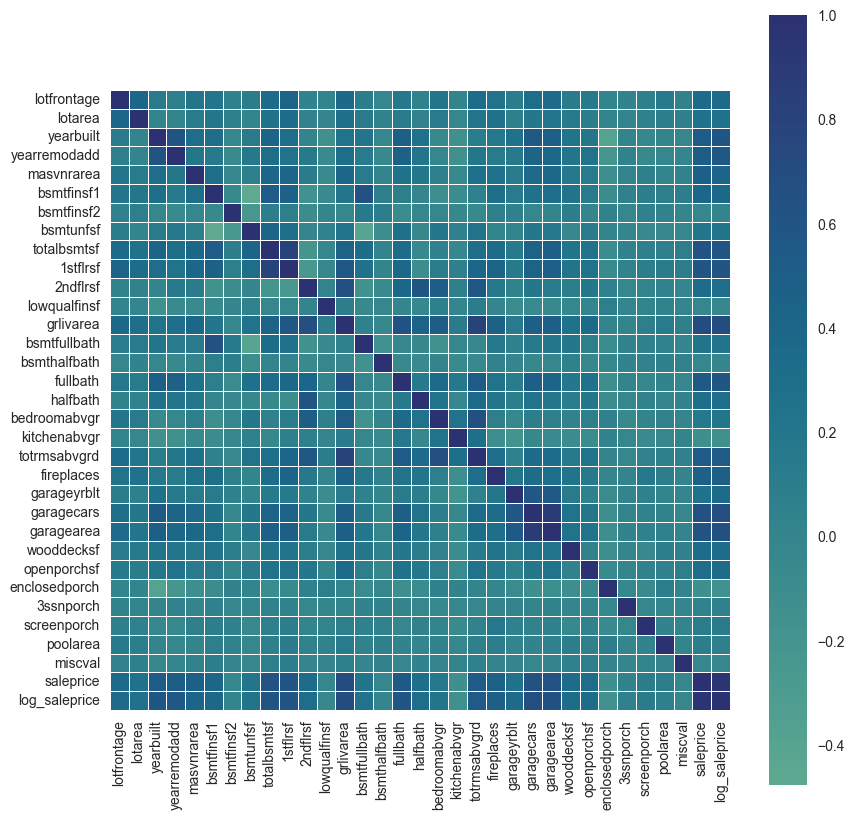

In [113]:
# Plot correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='crest', center=0, square=True, linewidths=.5,cbar=True)
plt.show()

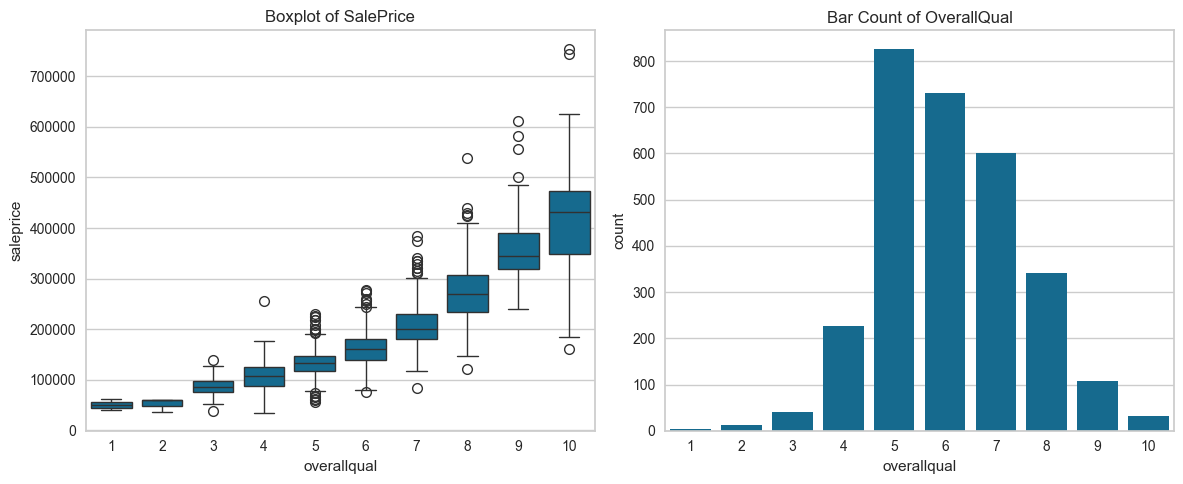

In [114]:
# Loos saleprice distribution for each ovrallqual
# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the boxplot of saleprice in the first subplot
sns.boxplot(x='overallqual', y='saleprice', data=df, ax=axes[0])
axes[0].set_title('Boxplot of SalePrice')

# Plot the bar count of overallqual in the second subplot
sns.countplot(x='overallqual', data=df, ax=axes[1])
axes[1].set_title('Bar Count of OverallQual')

# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()


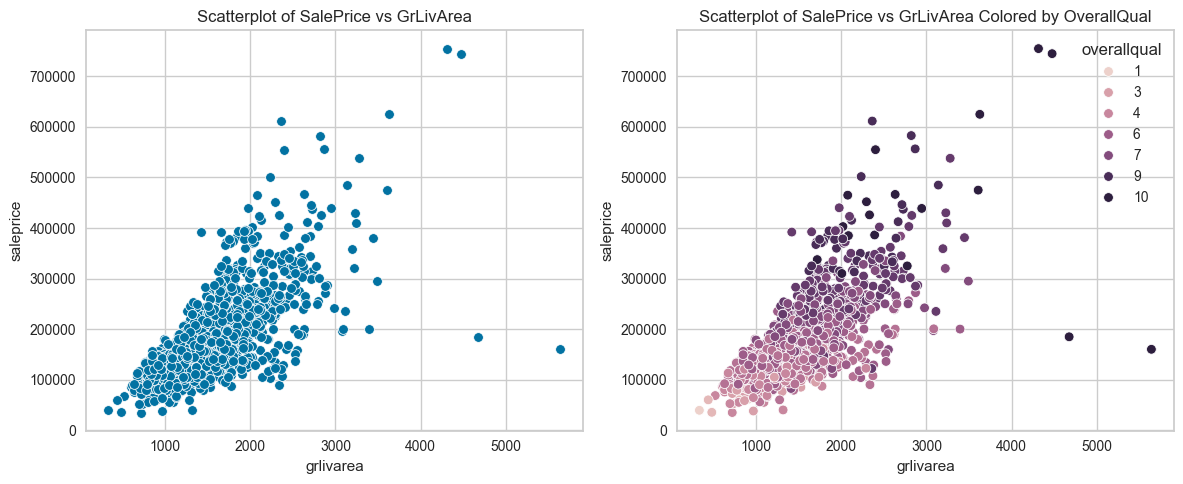

In [115]:
# Plot relation between saleprice and grlivarea
# Set the overall subplot size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the scatterplot of grlivarea and saleprice in the first subplot
sns.scatterplot(x='grlivarea', y='saleprice', data=df, ax=axes[0])
axes[0].set_title('Scatterplot of SalePrice vs GrLivArea')

# Plot the scatterplot of grlivarea and saleprice in the second subplot
sns.scatterplot(x='grlivarea', y='saleprice', data=df, ax=axes[1], hue='overallqual')
axes[1].set_title('Scatterplot of SalePrice vs GrLivArea Colored by OverallQual')

# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()

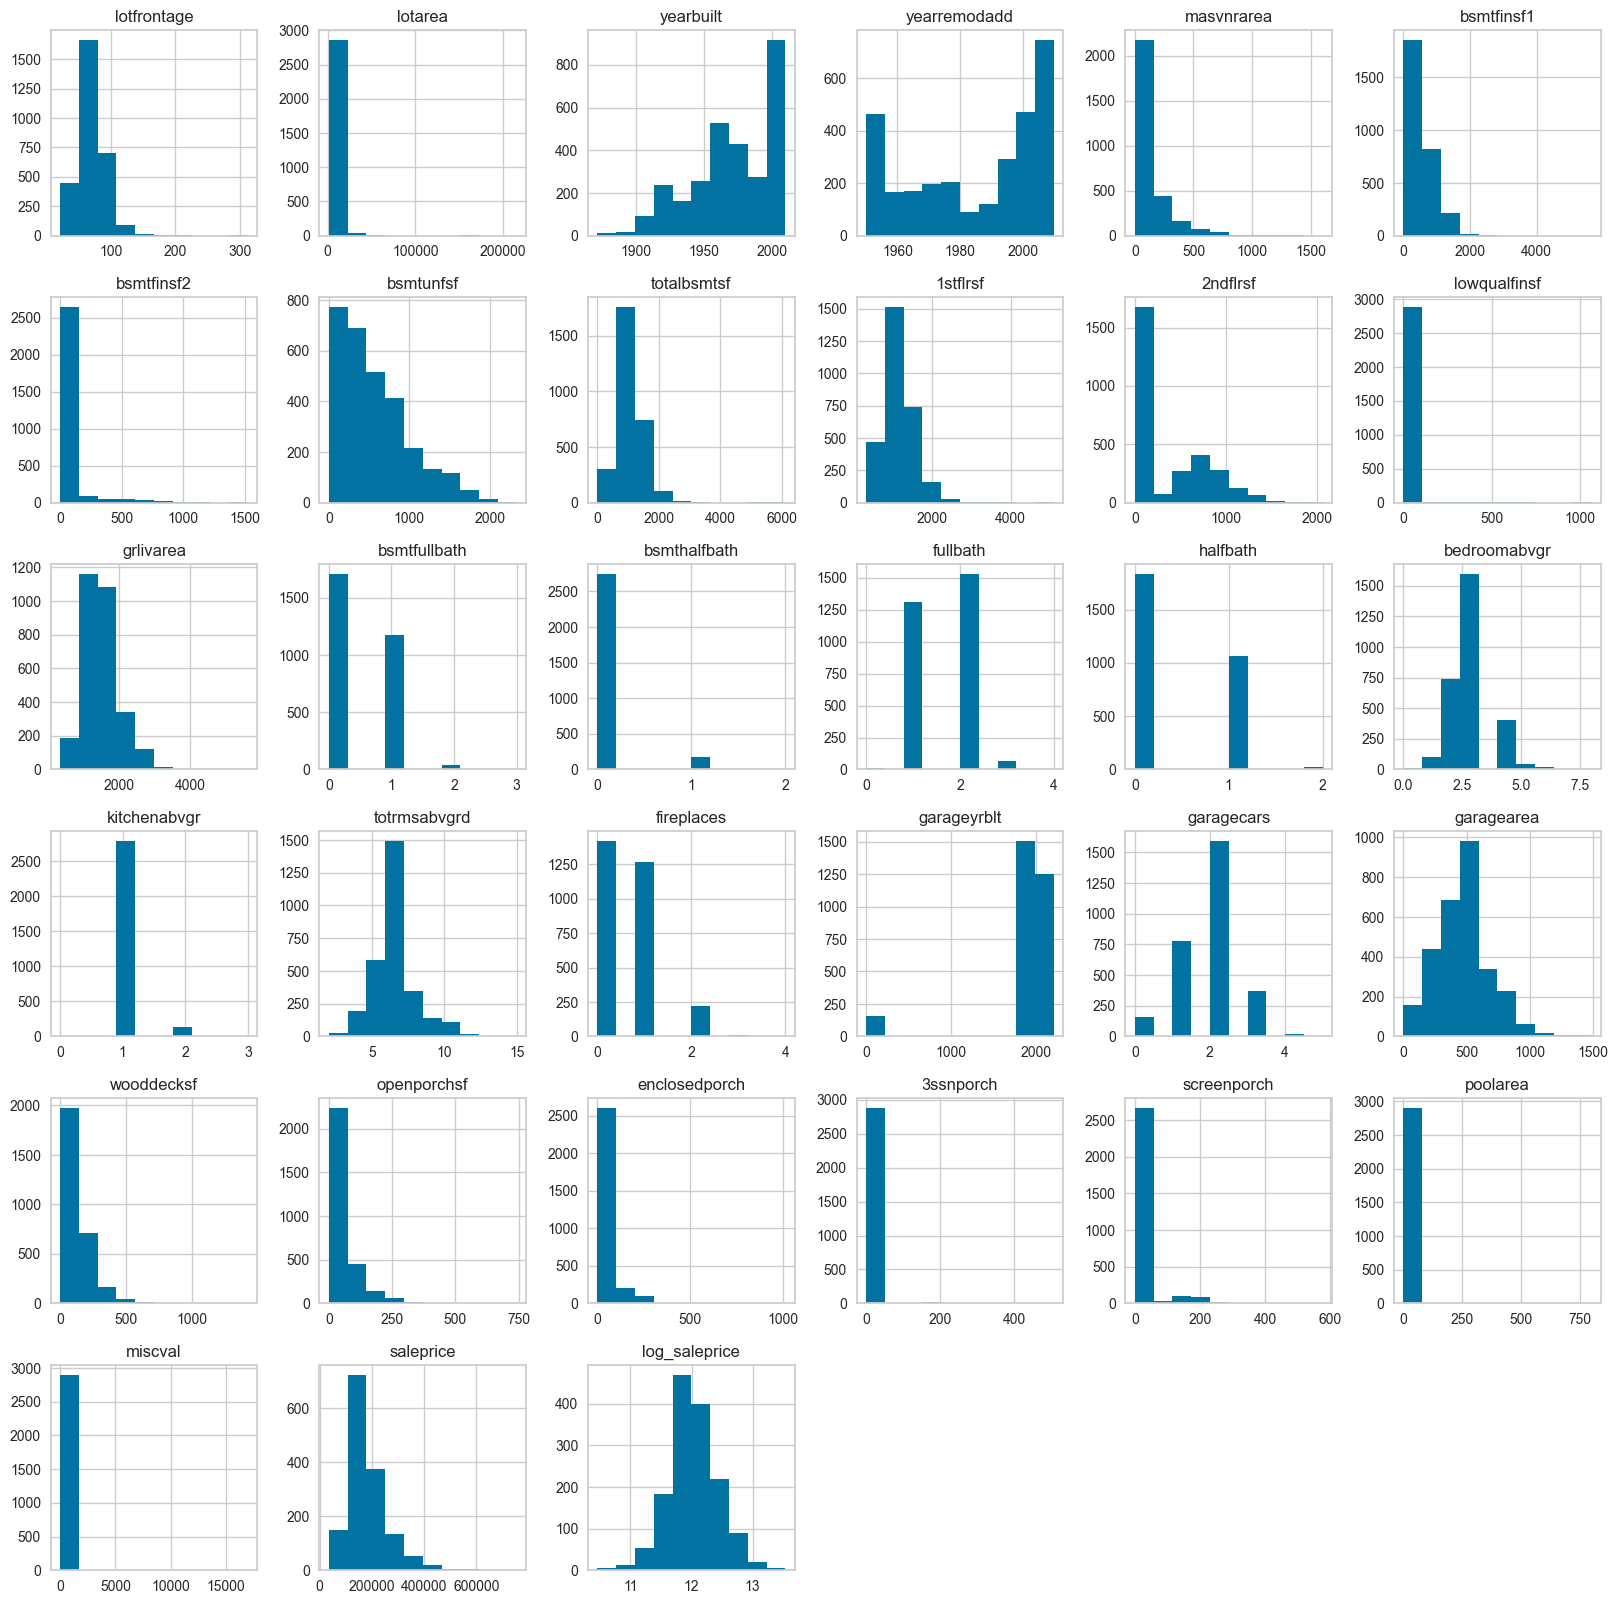

In [116]:
# Analysis for numeric values
ax = df.select_dtypes([float,int]).hist(figsize=(20,20))
plt.show()

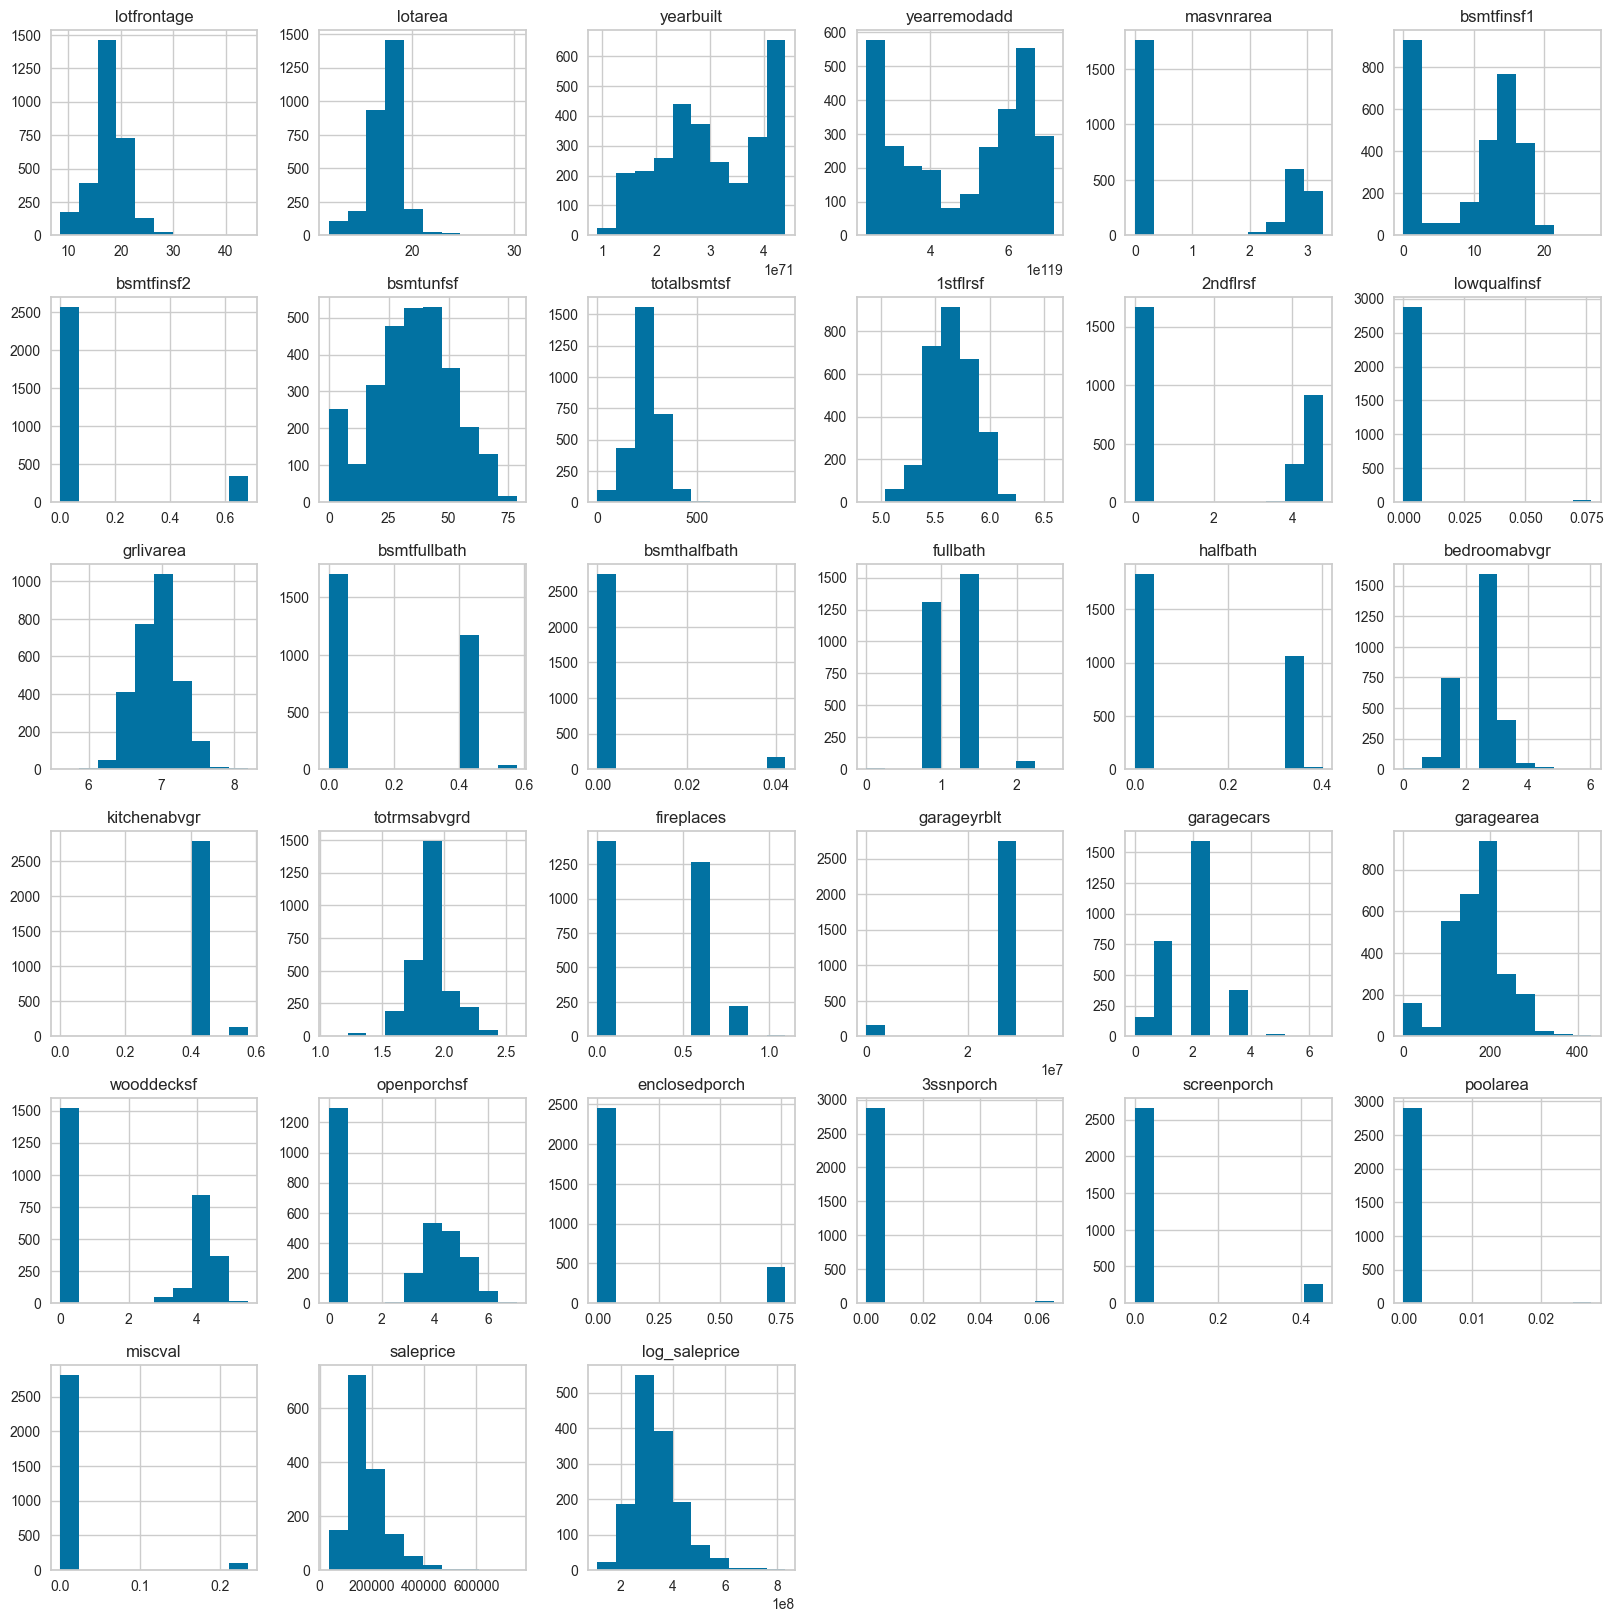

In [117]:
# Applying Box-Cox transformation to numeric columns
from scipy.stats import boxcox

# Get the numeric columns (excluding 'saleprice')
numeric_columns = df.select_dtypes(include=[np.number]).columns.drop('saleprice')

# Apply Box-Cox transformation to each numeric column
for col in numeric_columns:
  df[col], _ = boxcox(df[col] + 1)  # Adding 1 to handle zero values

# Analysis for numeric values
ax = df.select_dtypes([float,int]).hist(figsize=(20,20))
plt.show()

In [119]:
# Ensure that the categorical columns exist in the dataframe
categorical_columns = ['mssubclass', 'mszoning', 'street', 'alley', 'landcontour', 'utilities', 'lotconfig', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation', 'heating', 'centralair', 'functional', 'garagetype', 'paveddrive', 'saletype', 'salecondition']
df[categorical_columns] = df[categorical_columns].astype('category')

# Apply one-hot encoding to categorical columns
df_t = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
ordinal_columns = df_t.select_dtypes(include='object').columns
df_t[ordinal_columns] = df_t[ordinal_columns].astype('category')

# Apply label encoding to ordinal columns
for col in ordinal_columns:
  df_t[col] = df_t[col].cat.codes

print(df_t.shape)
df_t.head()

(2919, 216)


,lotfrontage,lotarea,lotshape,landslope,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saleprice,log_saleprice,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,alley_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,17.218534,17.222846,3,0,6,4,4.068218e+71,6.303785e+119,2.860781,2,4,2,3,3,2,15.033884,5,0.0,20.224924,214.055176,0,4,5.493235,4.433494,0.0,7.108399,0.427973,0.000000,1.472310,0.347183,2.549113,0.427643,2,2.080035,0.000000,2,2.942824e+07,1,2.309694,193.550147,4,4,0.000000,4.308115,0.00000,0.0,0.0,0.0,3,4,1,0.0,1,2,208500.0,3.792568e+08,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,